# Parallel accelerators with pmap


In [1]:
import jax
import jax.numpy as jnp
from jax import random

key = random.PRNGKey(0)

In [2]:
jax.devices()

[GpuDevice(id=0, process_index=0),
 GpuDevice(id=1, process_index=0),
 GpuDevice(id=2, process_index=0),
 GpuDevice(id=3, process_index=0)]

In [3]:
from jax import pmap

In [5]:
y = pmap(lambda x: x ** 2)(jnp.arange(4))
print(y)


[0 1 4 9]


In [6]:
z = y / 2
print(z)


[0.  0.5 2.  4.5]


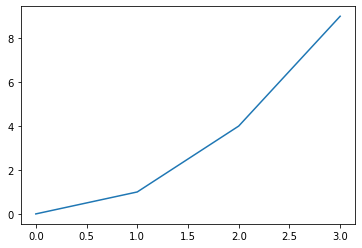

In [7]:
import matplotlib.pyplot as plt
plt.plot(y)

In [9]:
keys = random.split(random.PRNGKey(0), 4)
mats = pmap(lambda key: random.normal(key, (5000, 5000)))(keys)
result = pmap(jnp.dot)(mats, mats)
print(pmap(jnp.mean)(result))

[-0.008041   -0.0026529   0.00090758 -0.01222017]


In [10]:
timeit -n 5 -r 5 pmap(jnp.dot)(mats, mats).block_until_ready()


2.74 ms ± 33 µs per loop (mean ± std. dev. of 5 runs, 5 loops each)
